### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 8b4e, normal emittance

In [2]:
# Define study
STUDY_NAME = "opt_collapse_700_2800_oct_scan_8b4e"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add index i_oct_b1 from multiindex to columns
df = df.reset_index(level=3)
df = df.reset_index(level=3)

# Keep only relevant collider
#df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df

i_oct_b2  i_oct_b1  normalized amplitude in xy-plane  \
beam  qx     qy                                                             
lhcb1 62.305 60.310   -150.00   -150.00                               4.5   
             60.310   -131.25   -131.25                               4.5   
             60.310   -112.50   -112.50                               4.5   
             60.310    -93.75    -93.75                               4.5   
             60.310    -75.00    -75.00                               4.5   
...                       ...       ...                               ...   
      62.329 60.334    225.00    225.00                               4.5   
             60.334    243.75    243.75                               4.5   
             60.334    262.50    262.50                               4.5   
             60.334    281.25    281.25                               4.5   
             60.334    300.00    300.00                               4.5   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.310  62.305  60.310  15.0  15.0        89.0        86.0   
             60.310  62.305  60.310  15.0  15.0        89.0        86.0   
             60.310  62.305  60.310  15.0  15.0        89.0        86.0   
             60.310  62.305  60.310  15.0  15.0        89.0        86.0   
             60.310  62.305  60.310  15.0  15.0        89.0        86.0   
...                     ...     ...   ...   ...         ...         ...   
      62.329 60.334  62.329  60.334  15.0  15.0        89.0        86.0   
             60.334  62.329  60.334  15.0  15.0        89.0        86.0   
             60.334  62.329  60.334  15.0  15.0        89.0        86.0   
             60.334  62.329  60.334  15.0  15.0        89.0        86.0   
             60.334  62.329  60.334  15.0  15.0        89.0        86.0   

                     num_particles_per_bunch  crossing_angle  
beam  qx     qy                                               
lhcb1 62.305 60.310             1.400000e+11           250.0  
             60.310             1.400000e+11           250.0  
             60.310             1.400000e+11           250.0  
             60.310             1.400000e+11           250.0  
             60.310             1.400000e+11           250.0  
...                                      ...             ...  
      62.329 60.334             1.400000e+11           250.0  
             60.334             1.400000e+11           250.0  
             60.334             1.400000e+11           250.0  
             60.334             1.400000e+11           250.0  
             60.334             1.400000e+11           250.0  

[606 rows x 11 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-150,300,25, endpoint=True)

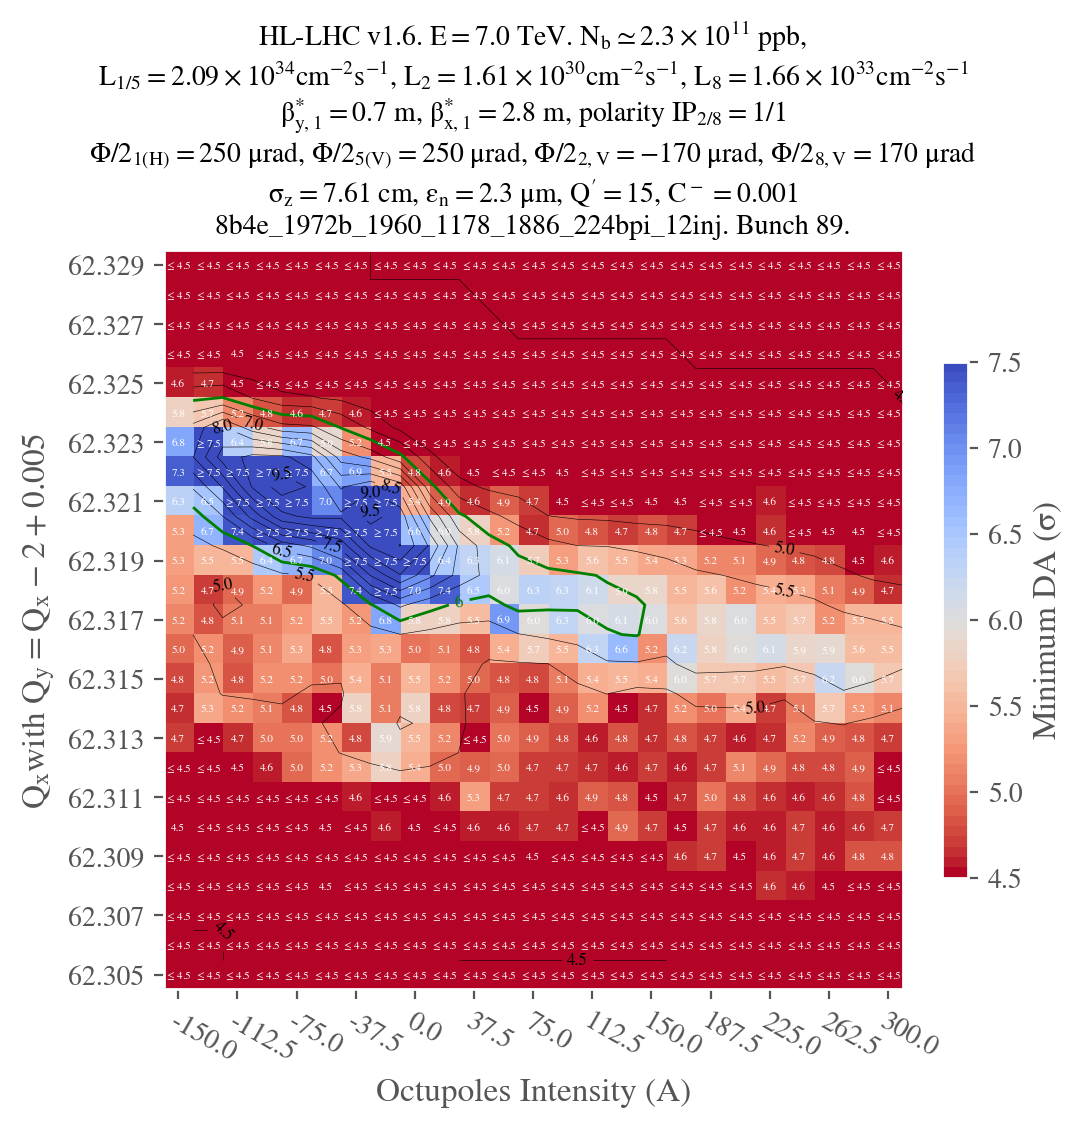

In [5]:
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    bety = 2.8,
    betx = 0.7,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    #title="opt_collapse_1100_1500_oct_scan",
)

### standard, normal emittance

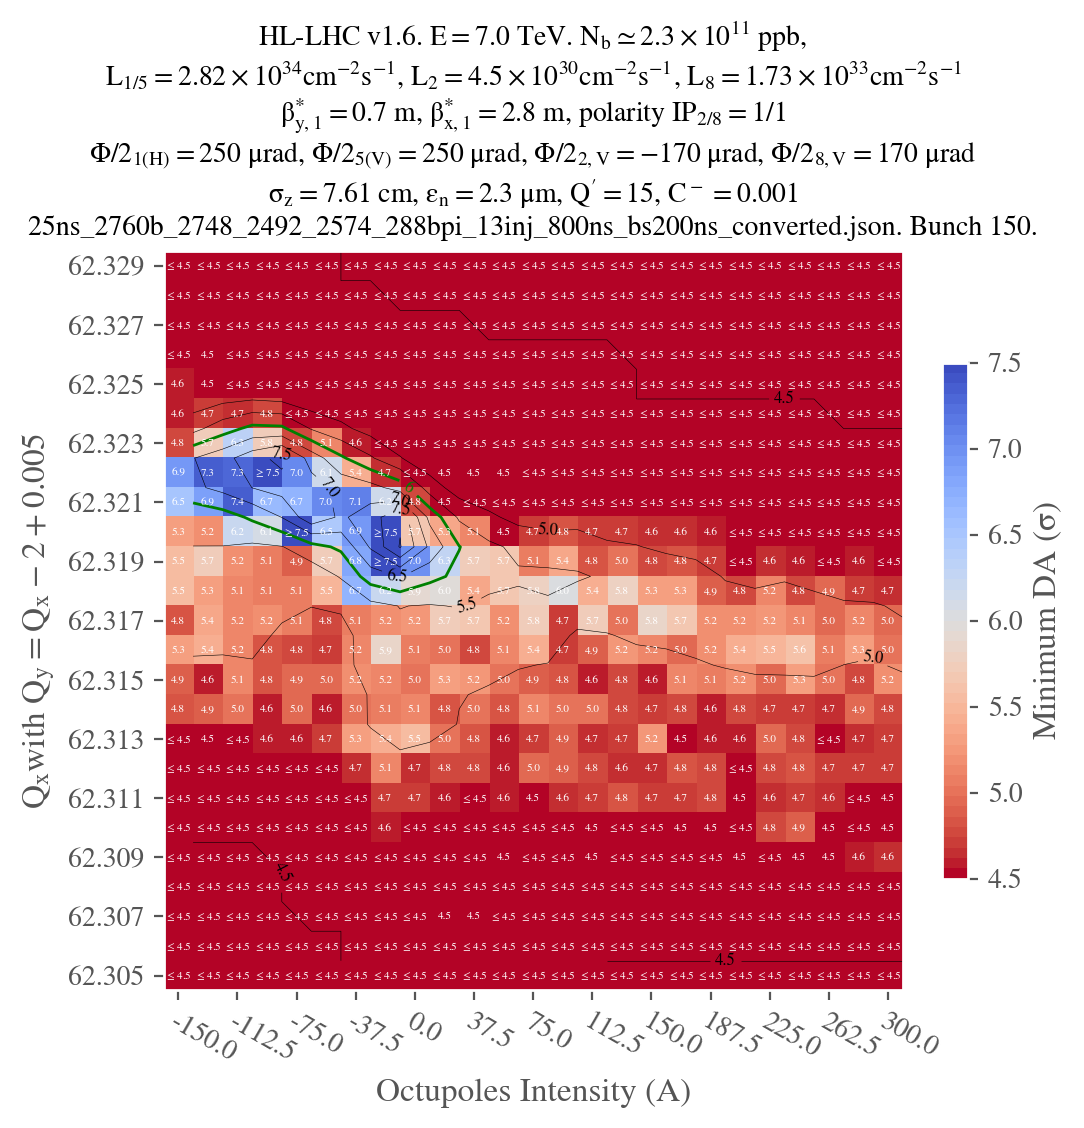

In [6]:
# Define study
STUDY_NAME = "opt_collapse_700_2800_oct_scan_standard"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df = df.reset_index(level=3)
df = df.reset_index(level=3)

# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-150,300,25, endpoint=True)

df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    bety = 2.8,
    betx = 0.7,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    #title="opt_collapse_1100_1500_oct_scan",
)

### 8b4e,reduced emittance

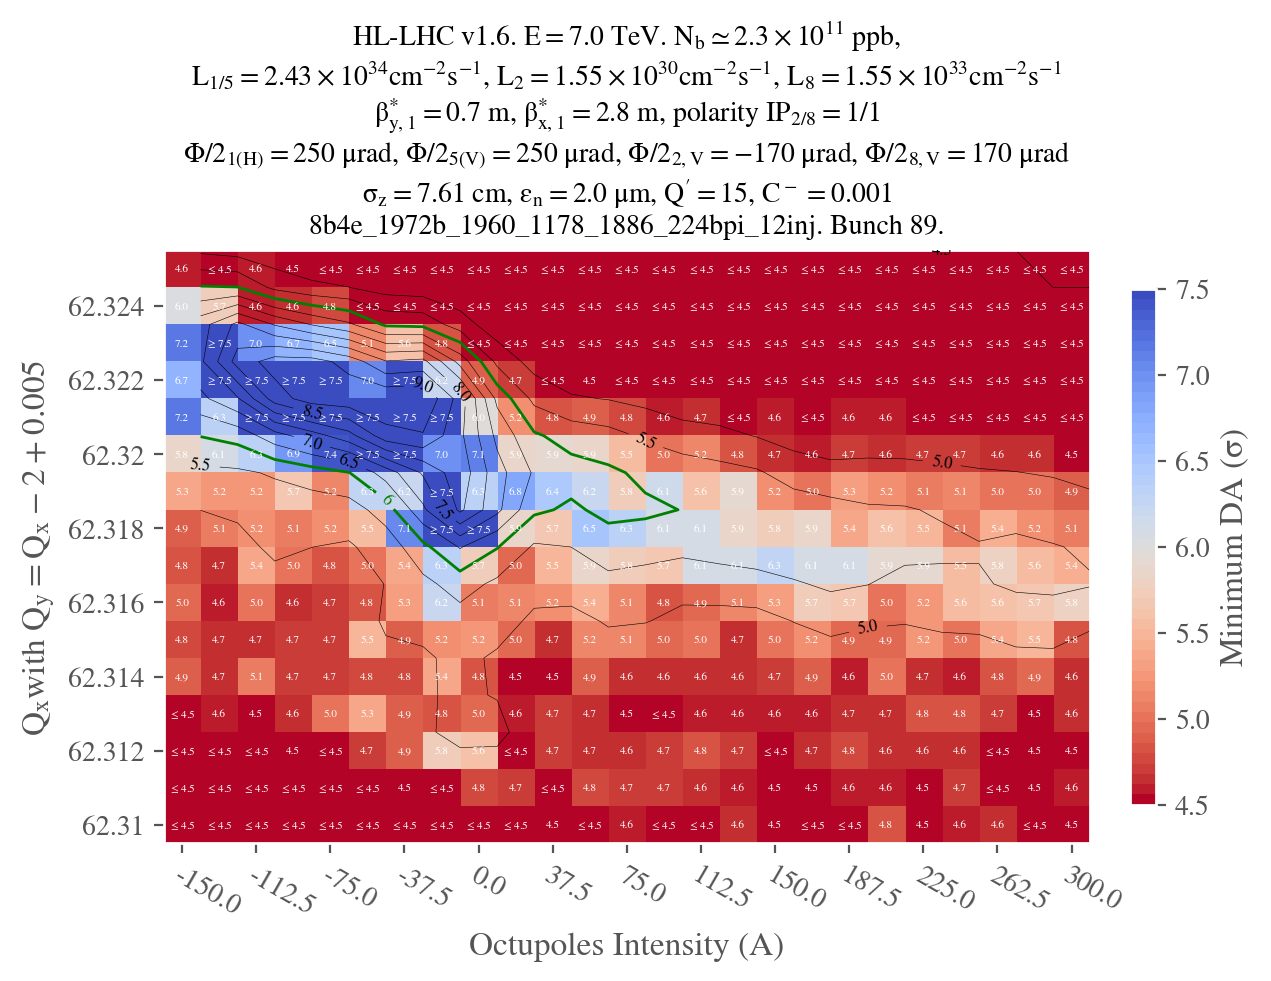

In [7]:
# Define study
STUDY_NAME = "opt_collapse_700_2800_oct_scan_8b4e_red_emit"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df = df.reset_index(level=3)
df = df.reset_index(level=3)
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-150,300,25, endpoint=True)

df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    bety = 2.8,
    betx = 0.7,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    #title="opt_collapse_1100_1500_oct_scan",
)

### standard, reduced emittance

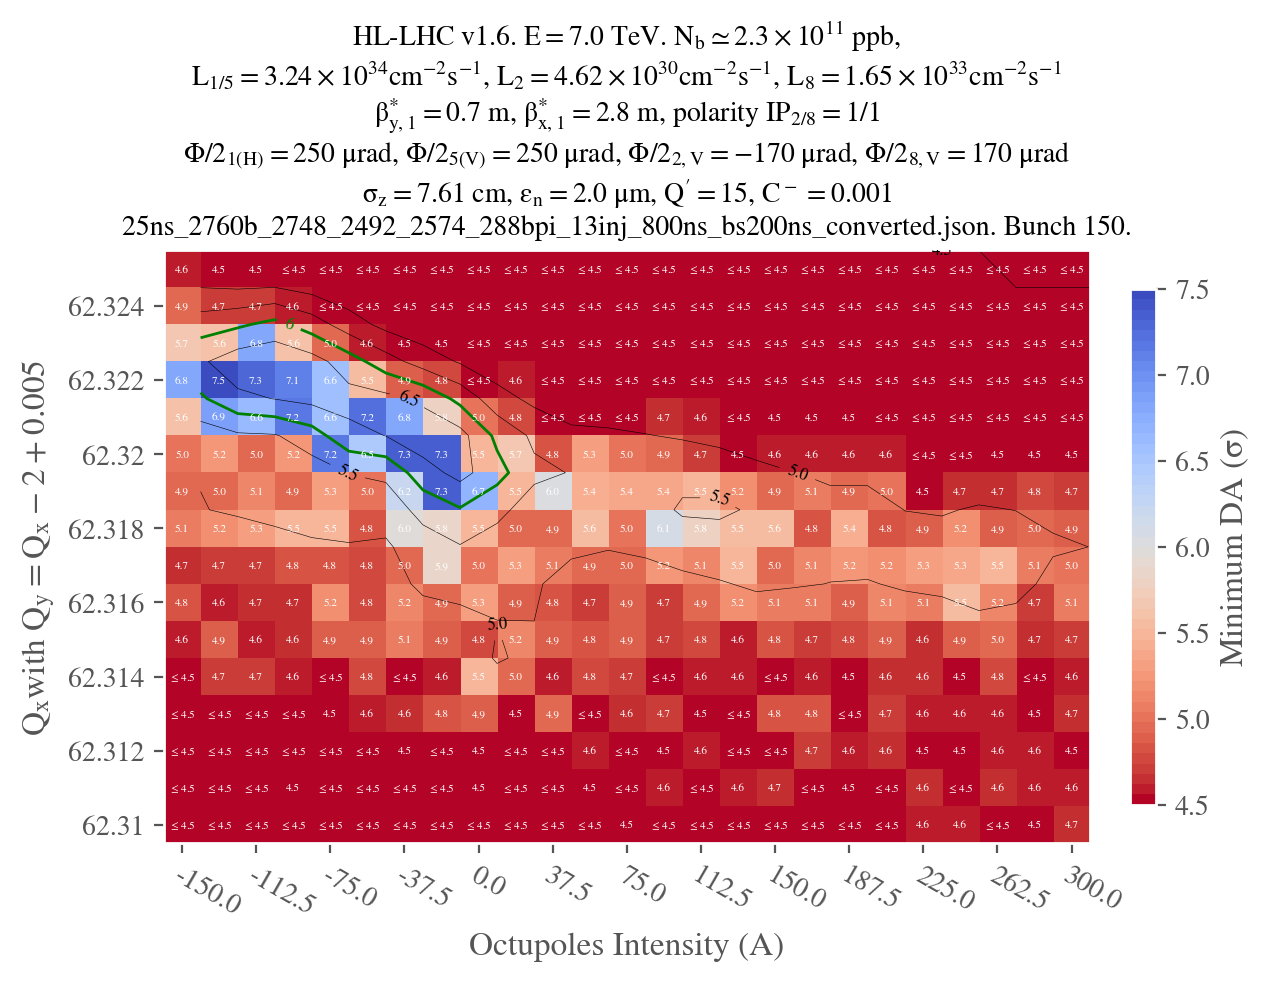

In [8]:
# Define study
STUDY_NAME = "opt_collapse_700_2800_oct_scan_standard_red_emit"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df = df.reset_index(level=3)
df = df.reset_index(level=3)
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-150,300,25, endpoint=True)

df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    bety = 2.8,
    betx = 0.7,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    #title="opt_collapse_1100_1500_oct_scan",
)